In [29]:
# ============================================
# 1. IMPORT REQUIRED LIBRARIES
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [30]:
def predictive_power_score(df, target):
    scores = []

    X = df.drop(columns=[target])
    y = df[target]

    # Convert target if categorical
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)

    for col in X.columns:
        X_col = X[[col]]

        # Encode categorical features
        if X_col[col].dtype == 'object':
            X_col[col] = LabelEncoder().fit_transform(X_col[col])

        X_train, X_test, y_train, y_test = train_test_split(
            X_col, y, test_size=0.3, random_state=42
        )

        model = DecisionTreeRegressor(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        score = r2_score(y_test, y_pred)
        scores.append((col, round(max(score, 0), 3)))

    return pd.DataFrame(scores, columns=["Feature", "Predictive_Power"]).sort_values(
        by="Predictive_Power", ascending=False
    )

# ============================================
# 2. LOAD DATASET
# ============================================

df = pd.read_csv("adult_with_headers.csv")

# Display first 5 rows
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [31]:
# ============================================
# 3. BASIC DATA EXPLORATION
# ============================================

# Shape of dataset
print("Shape:", df.shape)

# Data types
df.info()

# Summary statistics
df.describe()

# Check missing values
df.isnull().sum()


Shape: (32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [32]:
# ============================================
# 4. HANDLE MISSING VALUES
# ============================================

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Verify missing values
df.isnull().sum()


/tmp/ipython-input-134176084.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-134176084.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [33]:
# ============================================
# 5. SCALING TECHNIQUES
# ============================================

# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# ----- Standard Scaling -----
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[num_cols] = standard_scaler.fit_transform(df[num_cols])

# ----- Min-Max Scaling -----
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_cols] = minmax_scaler.fit_transform(df[num_cols])

df_standard_scaled.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K


In [34]:
# ============================================
# 6. ENCODING TECHNIQUES
# ============================================

df_encoded = df.copy()

categorical_cols = df_encoded.select_dtypes(include='object').columns

for col in categorical_cols:
    if df_encoded[col].nunique() < 5:
        # One-Hot Encoding
        df_encoded = pd.get_dummies(df_encoded, columns=[col], drop_first=True)
    else:
        # Label Encoding
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,True,False
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,True,False
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,True,False
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,True,False
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,False,False


In [35]:
# ============================================
# 7. FEATURE ENGINEERING
# ============================================

# Feature 1: Education efficiency
df_encoded['education_hours_ratio'] = (
    df_encoded['education_num'] / (df_encoded['hours_per_week'] + 1)
)

# Feature 2: Total capital
df_encoded['capital_total'] = (
    df_encoded['capital_gain'] + df_encoded['capital_loss']
)

df_encoded[['education_hours_ratio', 'capital_total']].head()


,education_hours_ratio,capital_total
0,0.317073,2174
1,0.928571,0
2,0.219512,0
3,0.170732,0
4,0.317073,0


In [36]:
# ============================================
# 8. LOG TRANSFORMATION (SKEWED FEATURE)
# ============================================

# Apply log transformation to capital_gain
df_encoded['capital_gain_log'] = np.log1p(df_encoded['capital_gain'])

df_encoded[['capital_gain', 'capital_gain_log']].head()


,capital_gain,capital_gain_log
0,2174,7.684784
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000


In [37]:
# ============================================
# 9. OUTLIER DETECTION USING ISOLATION FOREST
# ============================================

iso = IsolationForest(
    contamination=0.05,
    random_state=42
)

outlier_labels = iso.fit_predict(df_encoded[num_cols])

# Keep only non-outliers
df_cleaned = df_encoded[outlier_labels == 1]

print("Before removing outliers:", df_encoded.shape)
print("After removing outliers :", df_cleaned.shape)


Before removing outliers: (32561, 18)
After removing outliers : (30933, 18)


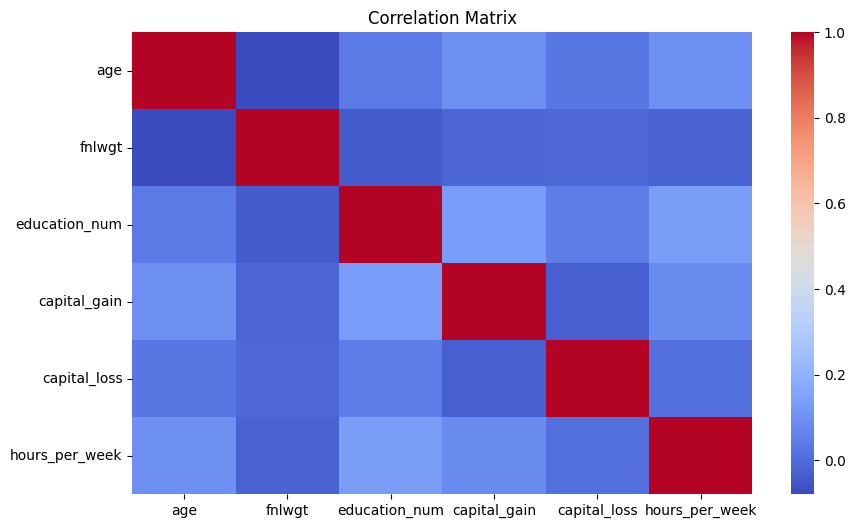

In [38]:
# ============================================
# 10. CORRELATION MATRIX
# ============================================

plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned[num_cols].corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [39]:
# ============================================
# 11. PPS (PREDICTIVE POWER SCORE)
# ============================================

# pps_matrix = pps.matrix(df_cleaned) # Commented out due to ppscore installation issues

# Using custom predictive_power_score function
pps_results = predictive_power_score(df_cleaned, target='income_ >50K')
pps_results.head(10)

,Feature,Predictive_Power
15,capital_total,0.190
7,relationship,0.188
5,marital_status,0.181
16,capital_gain_log,0.161
9,capital_gain,0.161
14,education_hours_ratio,0.132
4,education_num,0.120
3,education,0.120
6,occupation,0.116
0,age,0.095


In [40]:
# ============================================
# 12. FINAL DATASET READY FOR MODELING
# ============================================

df_cleaned.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,education_hours_ratio,capital_total,capital_gain_log
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,True,False,0.317073,2174,7.684784
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,True,False,0.928571,0,0.000000
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,True,False,0.219512,0,0.000000
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,True,False,0.170732,0,0.000000
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,False,False,0.317073,0,0.000000
